# Dynamic of Network: part -II

 This is part two on "Dynamic of Network" code series, please refer to part 1 before proceeding ahead.

**Note**:
In this part two we would like to explore the concept of **preferential attachment** or the principle that nodes with higher degrees (i.e., connected to more nodes) are more likely to gain additional connections is central to the formation of **scale-free networks**. This principle can be incorporated into your update_graph function. The idea is to select nodes for new connections not uniformly at random but with a probability proportional to their degrees. Lets do it.

In [1]:
import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

This function below (**initialize_graph(n, k)**) is used to create an initial network of nodes with each node connected to its k nearest neighbors. The network is a graph G where each node is connected to its k nearest neighbors, creating a circular structure. 

In [2]:
def initialize_graph(n, k):
    """
    Initializes a circular graph with n nodes where each node is connected to k nearest neighbors.
    """
    G = nx.Graph()
    for i in range(n):
        for j in range(1, k//2 + 1):
            G.add_edge(i, (i + j) % n)
            G.add_edge(i, (i - j) % n)
    return G

The **update_graph function** represents an evolution or dynamic change in your network. This function implements a sort of "rewiring" operation.

Please note that this function uses random.choices() which allows for weighted selection. In this case, the weight for each node is its degree, implementing the principle of preferential attachment. This function returns a list, so we select the first (and only) item from the list with [0]

In [3]:
def update_graph(G):
    """
    Updates the graph by adding a new node connected to existing nodes with a probability 
    proportional to their degree (preferential attachment). The new node forms k connections.
    """
    k = 2
    degrees = dict(G.degree())
    nodes_probs = [degrees[n] / sum(degrees.values()) for n in G.nodes()]
    chosen_nodes = np.random.choice(G.nodes(), size=k, replace=False, p=nodes_probs)
    new_node = max(G.nodes()) + 1
    for node in chosen_nodes:
        G.add_edge(new_node, node)
    return G


After setting the update_graph function, whihc is implementing a preferential attachment scheme, it would be beneficial to visualize this dynamic more clearly. To observe the effect of preferential attachment,lets plot the degree distribution of the network, as scale-free networks show a power-law degree distribution.

To do this, we can modify your **simulate_network_dynamics function** (from part 1 code) to also plot degree distributions at different steps.

In [4]:
def simulate_network_dynamics(n, k, steps):
    """
    Simulates network dynamics and plots the network state and degree distribution at intervals.

    :param n: Initial number of nodes in the network.
    :param k: Initial number of neighbors of each node.
    :param steps: Number of steps to simulate.

    This function initializes a network with n nodes and k neighbors for each node. 
    Then, it performs a specified number of steps to simulate network dynamics, where
    at every step, a new node is added to the network using the preferential attachment rule. 
    The state of the network and its degree distribution are plotted at the start, at each 25th step, 
    and at the end of simulation.
    """
    # Initialize the network
    G = initialize_graph(n, k)

    # Calculate the number of subplots needed
    num_subplots = ((steps - 1) // 25) + 2  # +2 for time step 0 and the final time step

    # Create a figure to hold the subplots
    fig, axs = plt.subplots(2, num_subplots, figsize=(6 * num_subplots, 12))  # 2 rows and num_subplots columns

    # Plot initial network and its degree distribution
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, ax=axs[0, 0])
    axs[0, 0].set_title(f'Network at Time Step 0')  # Set title for the first subplot

    degrees = dict(G.degree())
    axs[1, 0].hist(degrees.values(), bins=range(1, max(degrees.values()) + 1), edgecolor='black')
    axs[1, 0].set_title('Degree Distribution at Time Step 0')  # Set title for the first subplot

    for step in range(steps):
        # Update the network topology at every step
        G = update_graph(G)

        # Plot at each 25th step, and at the final step
        if (step + 1) % 25 == 0 or step == steps - 1:
            subplot_idx = step // 25 + 1 if step != steps - 1 else num_subplots - 1  # Last plot for the final time step
            
            # Draw the network graph
            pos = nx.spring_layout(G)
            nx.draw(G, pos, with_labels=True, ax=axs[0, subplot_idx])
            axs[0, subplot_idx].set_title(f'Network at Time Step {step+1}')

            # Plot degree distribution
            degrees = dict(G.degree())
            axs[1, subplot_idx].hist(degrees.values(), bins=range(1, max(degrees.values()) + 1), edgecolor='black')
            axs[1, subplot_idx].set_title(f'Degree Distribution at Time Step {step+1}')
            
    plt.tight_layout()
    plt.show()


**Running the simulation**:
Lets start the initialize_graph function starts with a small number of nodes, each with two edges. The update_graph function adds a new node at each step, connecting it to existing nodes with a probability proportional to their degree. The simulate_network_dynamics function plots the state of the network and its degree distribution at the start, every 25th step, and at the end of the simulation.

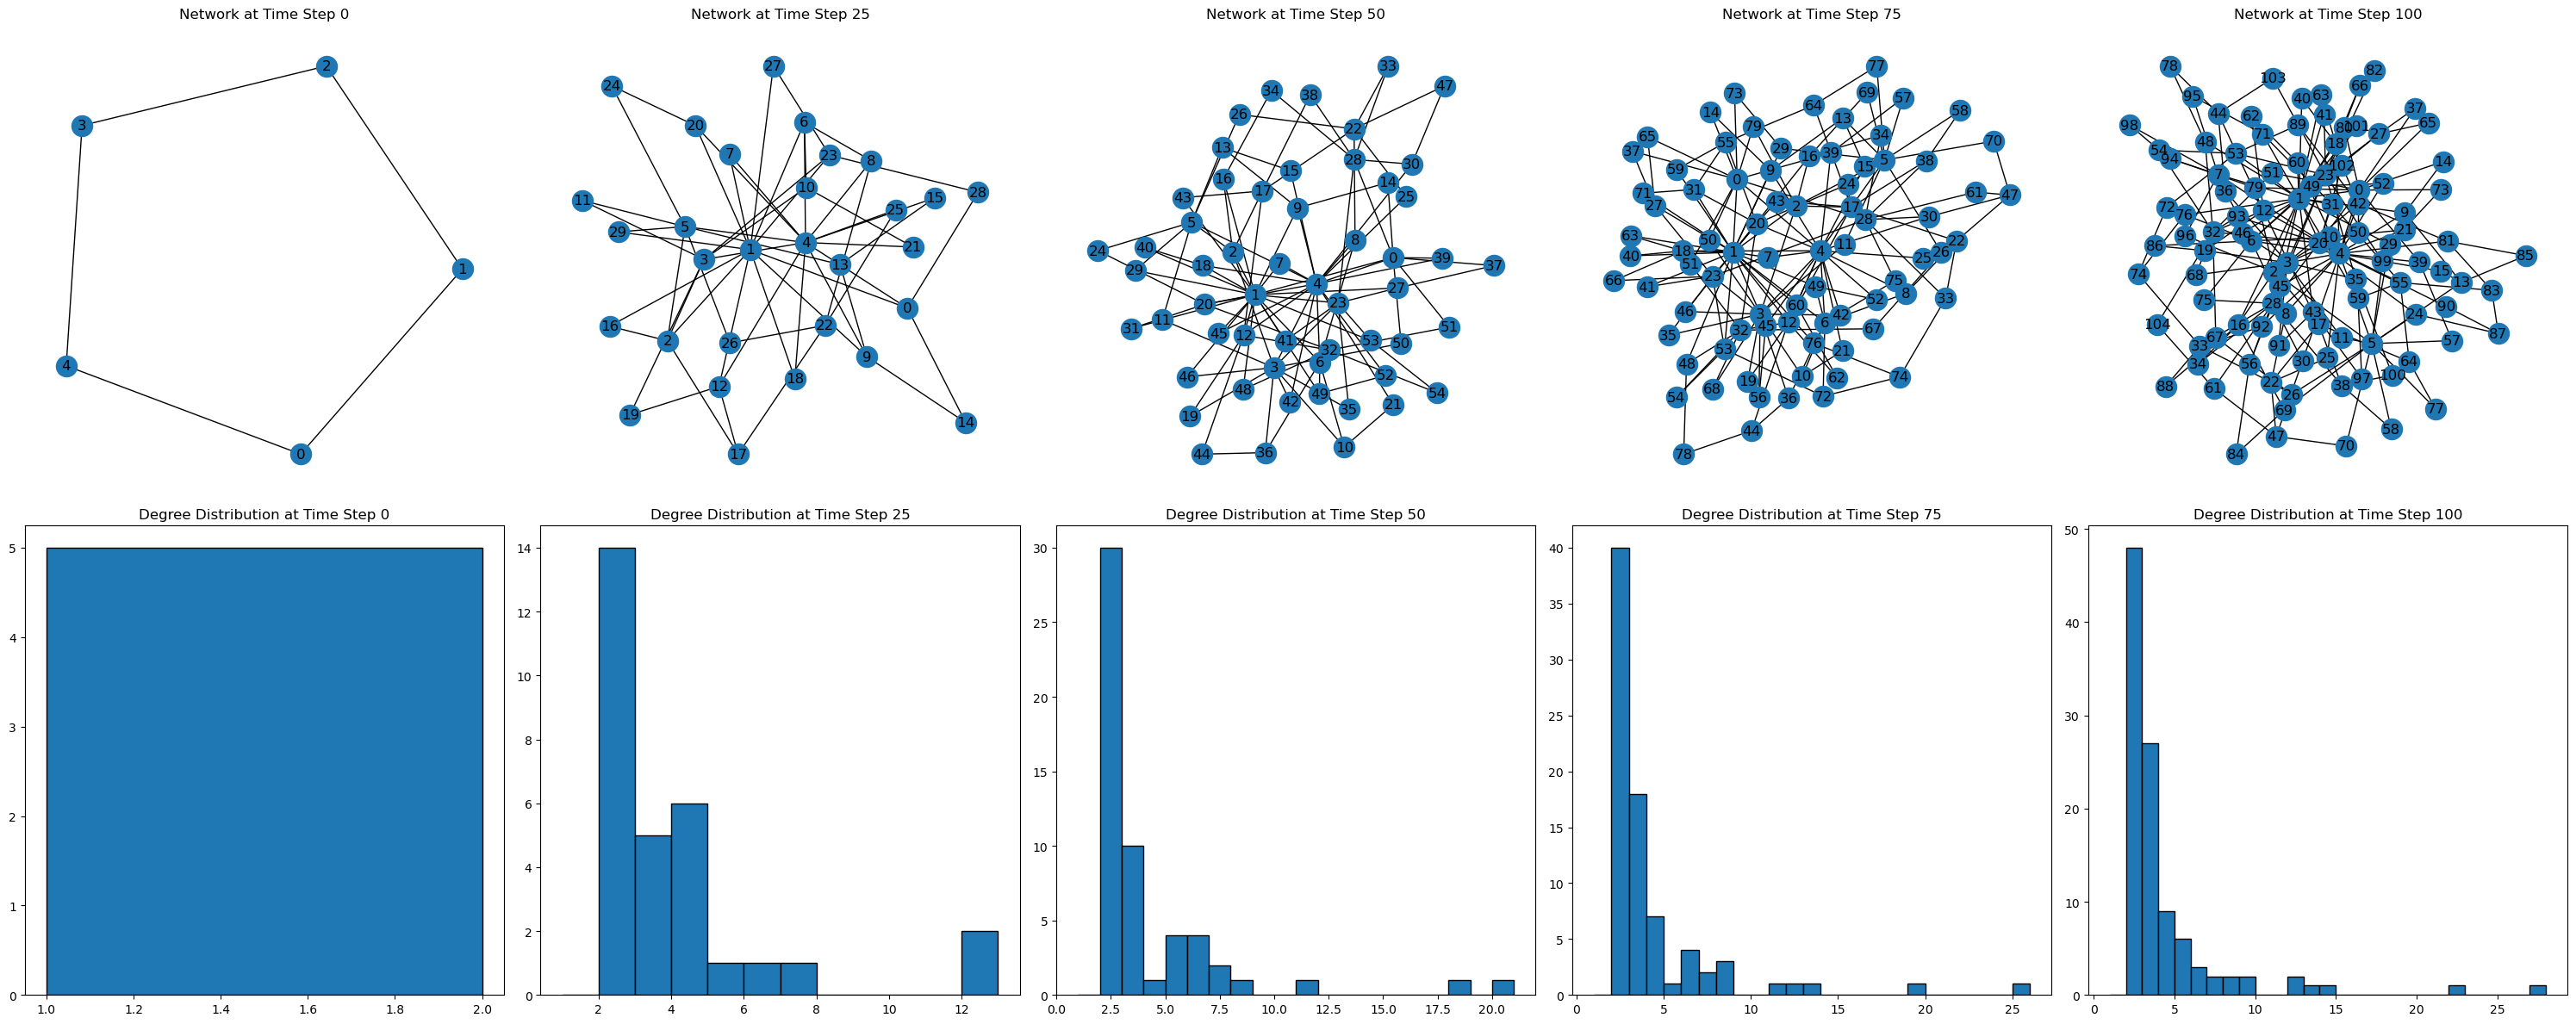

In [5]:
simulate_network_dynamics(5, 2, 100)

Have Fun !!!